# Utilising an Autoencoder with classification to detect fraudelent activity 

As a Data Scientist, your most powerful tool is your ability to structure a problem. The Data Scientist's toolbox is an extensive and rich one, where misuse of this is typically found in the construction of the problem.

My goal in this analysis is to show all you data lovers out there, how powerful data analysis is through thorough and clear planning. 

This will be a short run through, and highlights my initial thoughts when designing a problem.  

0. ### Design the problem
    We have a binary target, with a dataset of size n by m. This is a supervised learning problem 
    and will require classification models. 
    Sometimes simply fitting a model won't solve your problem, alternative views must be recruited to inspect the data, the tools required and how the model is evaluated. 
1. ### Collect data
    Reading the data utilising pandas package. Pandas is a great tool for simple use of 
    dataframes and initial visualisations.
2. ### Inspect data
    Inspect the imbalanced dataset. Are the class labels balanced? Do we need to introduce 
    class weightings in our problem? 
3. ### Visualising data
4. ### Autoencoder 
5. ### Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('creditcard.csv')

In [3]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_data['Class'].sum()

492

In [5]:
print("{}% are fraudulent".format(round(raw_data['Class'].sum() / len(raw_data) * 100,2)))

0.17% are fraudulent


In [6]:
label = raw_data['Class']
time = raw_data['Time']
data = raw_data.drop(['Class','Time'],axis=1)

In [7]:
mapping = {1:'red',0:'blue'}

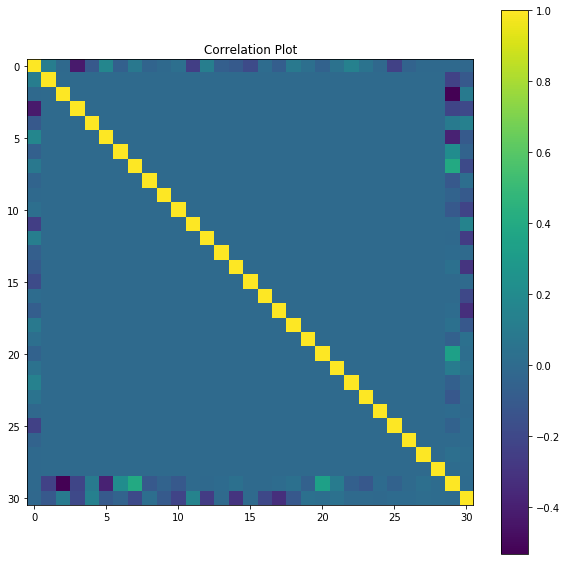

In [8]:
# Correlation Plot
fig, ax = plt.subplots(figsize=(10,10))
c = ax.imshow(raw_data.corr())
plt.title('Correlation Plot')
plt.colorbar(c)
plt.show()

So, why is it from the above correlation plot most entries are 0? This is the importance of checking the data, and above all, reading the recommended information on the data. The features of the data are values from principal components. 

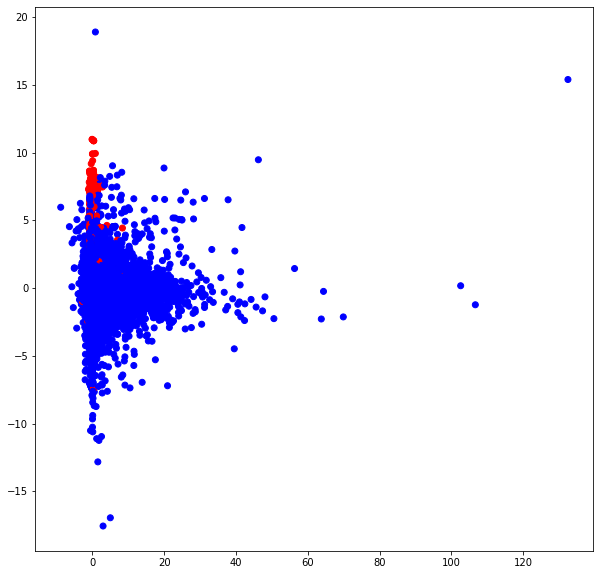

In [9]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

Z = StandardScaler().fit_transform(data)


points = PCA(n_components=2).fit_transform(Z)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(points[:,0],points[:,1],c=label.map(mapping))
plt.show()

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def tanh_estimates(X):
    new_val = (1/2) * (np.tanh (0.01 * ((X - np.mean(X)) / np.std(X))) + 1)
    return new_val

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense, LeakyReLU
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, optimizers
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss

from keras import backend as K

X_train,X_test,y_train,y_test = train_test_split(data,label)

scale = FunctionTransformer(tanh_estimates).fit(X_train)
X_train_norm = scale.transform(X_train)
X_test_norm = scale.transform(X_test)

nb_epoch = 100
batch_size = 560
input_dim = data.shape[1] 

sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)

input_layer = Input(shape=(input_dim, ))


encoder = Dense(2,activation='sigmoid')(input_layer)

output_layer = Dense(input_dim, activation='relu')(encoder)


autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(metrics=['accuracy'],
                loss='mean_squared_error',
                optimizer=sgd)

encoder_ = Model(input_layer, encoder)

history = autoencoder.fit(X_train_norm, X_train_norm,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_norm, X_test_norm),
                    verbose=1,
                    validation_split=0.1,
                    ).history

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Train on 213605 samples, validate on 71202 samples
Epoch 1/100
213605/213605 [==============================] - 2s 7us/step - loss: 0.1531 - acc: 0.0017 - val_loss: 0.1310 - val_acc: 0.0022
Epoch 2/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1200 - acc: 0.0017 - val_loss: 0.1123 - val_acc: 0.0022
Epoch 3/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1086 - acc: 0.0017 - val_loss: 0.1061 - val_acc: 0.0022
Epoch 4/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1050 - acc: 0.0017 - val_loss: 0.1042 - val_acc: 0.0022
Epoch 5/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1038 - acc: 0.0017 - val_loss: 0.1036 - val_acc: 0.0022
Epoch 6/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1035 - acc: 0.0019 - val_loss: 0.1034 - val_acc: 0.0036
Epoch 7/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1034 - acc: 0.2846 - val_loss: 0

213605/213605 [==============================] - 1s 3us/step - loss: 0.1033 - acc: 0.8507 - val_loss: 0.1033 - val_acc: 0.8486
Epoch 60/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1033 - acc: 0.8507 - val_loss: 0.1033 - val_acc: 0.8486
Epoch 61/100
213605/213605 [==============================] - 1s 4us/step - loss: 0.1033 - acc: 0.8507 - val_loss: 0.1033 - val_acc: 0.8486
Epoch 62/100
213605/213605 [==============================] - 1s 3us/step - loss: 0.1033 - acc: 0.8507 - val_loss: 0.1033 - val_acc: 0.8486
Epoch 63/100
213605/213605 [==============================] - 1s 3us/step - loss: 0.1033 - acc: 0.8507 - val_loss: 0.1033 - val_acc: 0.8486
Epoch 64/100
213605/213605 [==============================] - 1s 3us/step - loss: 0.1033 - acc: 0.8507 - val_loss: 0.1033 - val_acc: 0.8486
Epoch 65/100
213605/213605 [==============================] - 1s 3us/step - loss: 0.1033 - acc: 0.8507 - val_loss: 0.1033 - val_acc: 0.8486
Epoch 66/100
213605/213605 [=====

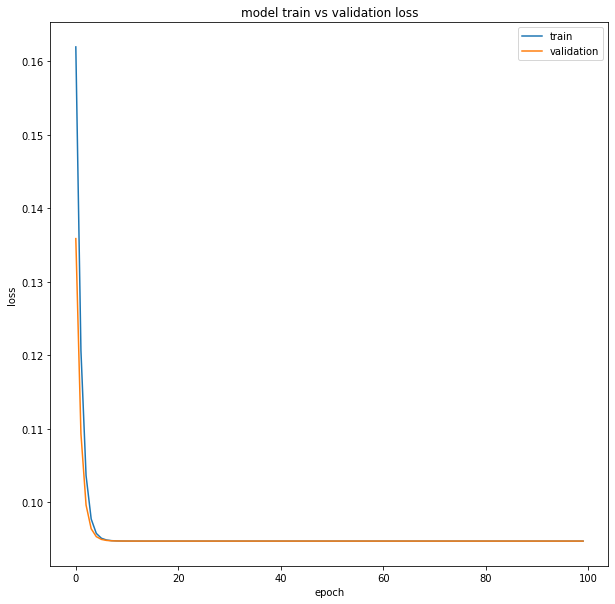

In [50]:
#plot our loss 
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(history['loss'])
ax.plot(history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


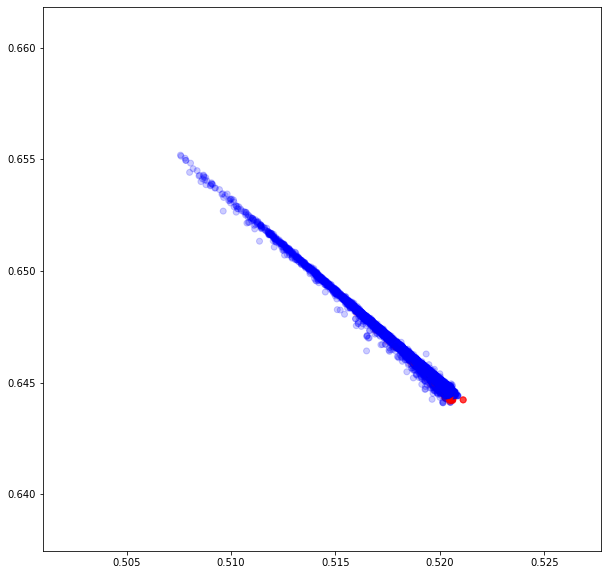

In [51]:
data_norm = FunctionTransformer(tanh_estimates).fit_transform(data)
X_new = encoder_.predict(data_norm)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_new[:,0],X_new[:,1],c=label.map(mapping),alpha=0.2)
plt.show()

In [16]:
from sklearn.svm import SVC

new_X_train = encoder_.predict(X_train_norm)
new_X_test = encoder_.predict(X_test_norm)

model = SVC(class_weight='balanced',kernel='rbf',C=100,gamma=1e-2).fit(X_train,y_train)
model_encoded = SVC(class_weight='balanced',kernel='rbf',C=100,gamma=1e-2).fit(new_X_train,y_train)

y_pred = model.predict(X_test)
new_y_pred = model_encoded.predict(new_X_test)

In [17]:
print(classification_report(y_test,new_y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     71083
           1       0.00      0.53      0.01       119

    accuracy                           0.82     71202
   macro avg       0.50      0.67      0.45     71202
weighted avg       1.00      0.82      0.90     71202

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71083
           1       0.63      0.55      0.59       119

    accuracy                           1.00     71202
   macro avg       0.82      0.78      0.80     71202
weighted avg       1.00      1.00      1.00     71202



/usr/local/lib/python3.7/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


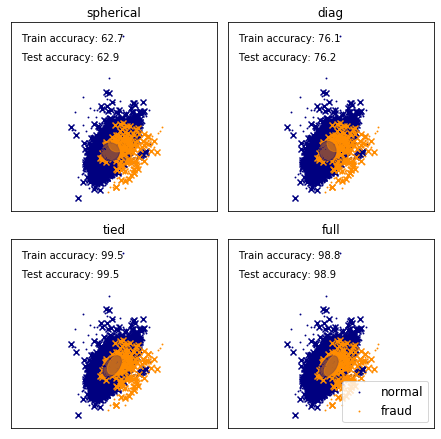

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
import matplotlib as mpl

colors = ['navy', 'darkorange']

X = encoder_.predict(data_norm)

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.33)
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')


        
n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

names = ['normal','fraud']

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    for n, color in enumerate(colors):
        data = X[label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [24]:
y_pred_ = estimator.predict(X)

In [27]:
print(classification_report(label,y_pred_))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.01      0.07      0.02       492

    accuracy                           0.99    284807
   macro avg       0.51      0.53      0.51    284807
weighted avg       1.00      0.99      0.99    284807

